# Example for using climate models - Application submitted for publication in a journal

This notebook serves as supplementary material for a paper submitted for publication in a journal. The user can reproduce the results and vary the input parameters.

The objective is to validate and use two lightweight climate models for aviation:
- one based on the use of the climate metric GWP* for calculating warming-equivalent emissions, in order to estimate temperature change though the TCRE metric ; several settings are studied here:
    - settings from Lee et al. based on simple methane models (named "Lee et al. settings" in the following),
    - updated settings based on improved methane models and very short lifetimes for non-CO2 effects (named "updated settings" in the following),
    - updated and improved settings based on improved methane models and calibrated lifetimes for non-CO2 effects (named "selected settings" in the following).
- the other based on the use of the open-source FaIR climate emulator for directly estimating temperature change.

For using AeroMAPS, it is requried to create a process with the studied models and default inputs, to update these input parameters if required, and to run the calculation. For more information on the use of the open-source AeroMAPS framework, please refer to other notebooks and to the documentation.

## Load and models

In [1]:
%matplotlib widget
import time
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from aeromaps import create_process
from aeromaps.core.models import (
    models_traffic,
    models_efficiency_bottom_up,
    models_energy_with_fuel_effect,
    models_offset,
    models_climate_simple_gwpstar,
    models_climate_gwpstar,
    models_climate_fair,
    models_sustainability,
    models_sustainability_without_equivalent_emissions,
)
from aeromaps.models.air_transport.aircraft_fleet_and_operations.fleet.fleet_model import (
    Fleet,
    AircraftParameters,
    Aircraft,
)

In [2]:
# Initial GWP* approach used in AeroMAPS
# The use of the new GWP* approach is equivalent by choosing adequate settings (Delta t of 20 years and s coefficient of 0) for all species
models_simple_gwpstar = {
    "models_traffic": models_traffic,
    "models_efficiency_bottom_up": models_efficiency_bottom_up,
    "models_energy_with_fuel_effect": models_energy_with_fuel_effect,
    "models_offset": models_offset,
    "models_climate_simple_gwpstar": models_climate_simple_gwpstar,
    "models_sustainability": models_sustainability,
}

# GWP* approach
models_gwpstar = {
    "models_traffic": models_traffic,
    "models_efficiency_bottom_up": models_efficiency_bottom_up,
    "models_energy_with_fuel_effect": models_energy_with_fuel_effect,
    "models_offset": models_offset,
    "models_climate_gwpstar": models_climate_gwpstar,
    "models_sustainability": models_sustainability,
}

# FaIR approach
models_fair = {
    "models_traffic": models_traffic,
    "models_efficiency_bottom_up": models_efficiency_bottom_up,
    "models_energy_with_fuel_effect": models_energy_with_fuel_effect,
    "models_offset": models_offset,
    "models_climate_fair": models_climate_fair,
    "models_sustainability_without_equivalent_emissions": models_sustainability_without_equivalent_emissions,
}

## 1. Validation of climate models

The two lightweight models studied here, with the three different settings for the GWP* approach, are compared and validated in this section. For that, comparisons with models from the literature are performed on historical data. Moreover, several test cases are proposed for evaluating the response to a variety of emissions profiles (long-term growth, long-term decline, stabilisation, sudden halt).

### 1.1. Comparison on historical data

For an initial validation of the two proposed methods, the figure below shows the resulting estimates in terms of temperature change attributable to aviation from 1940 to 2018, based on historical data and median climate sensitivities from Lee et al. The models studied in this paper are indicated as follows: AeroMAPS - Method (settings). Results for two reference models from the literature are also represented. On the one hand, we observe the temperature response estimated with the non-linear climate-chemistry response model AirClim. AirClim takes into account variations in the concentrations of CO2, water vapour, ozone, methane, and the formation of contrail-cirrus. It also considers their lifetimes, impacts on the Earth's radiation budget, and eventual alterations in near-surface temperatures. Two different scenarios, corresponding to different settings, are included. On the other hand, we visualise the result for the methodology used by Klöwer et al., which represents a simplified approach for estimating temperature response, through the use of a kind of Linear Warming-Equivalent CO2 emissions.

#### GWP* - Fixed calibration of 20 years from Lee et al.

In [3]:
# Create process
process_validation_historical_gwpstar20yr = create_process(
    configuration_file="data_climate/config_validation_historical.json",
    models=models_simple_gwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

process_validation_historical_gwpstar20yr.compute()

#### GWP* - Methane calibration and 1 year for the rest

In [4]:
# Create process
process_validation_historical_gwpstar1yr = create_process(
    configuration_file="data_climate/config_validation_historical.json",
    models=models_gwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

# Climate models
process_validation_historical_gwpstar1yr.parameters.contrails_gwpstar_variation_duration = 1.0
process_validation_historical_gwpstar1yr.parameters.contrails_gwpstar_s_coefficient = 0.0
process_validation_historical_gwpstar1yr.parameters.nox_short_term_o3_increase_gwpstar_variation_duration = (
    1.0
)
process_validation_historical_gwpstar1yr.parameters.nox_short_term_o3_increase_gwpstar_s_coefficient = (
    0.0
)
process_validation_historical_gwpstar1yr.parameters.nox_long_term_o3_decrease_gwpstar_variation_duration = (
    20.0
)
process_validation_historical_gwpstar1yr.parameters.nox_long_term_o3_decrease_gwpstar_s_coefficient = (
    0.25
)
process_validation_historical_gwpstar1yr.parameters.nox_ch4_decrease_gwpstar_variation_duration = (
    20.0
)
process_validation_historical_gwpstar1yr.parameters.nox_ch4_decrease_gwpstar_s_coefficient = 0.25
process_validation_historical_gwpstar1yr.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_variation_duration = (
    20.0
)
process_validation_historical_gwpstar1yr.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_s_coefficient = (
    0.25
)
process_validation_historical_gwpstar1yr.parameters.soot_gwpstar_variation_duration = 1.0
process_validation_historical_gwpstar1yr.parameters.soot_gwpstar_s_coefficient = 0.0
process_validation_historical_gwpstar1yr.parameters.h2o_gwpstar_variation_duration = 1.0
process_validation_historical_gwpstar1yr.parameters.h2o_gwpstar_s_coefficient = 0.0
process_validation_historical_gwpstar1yr.parameters.sulfur_gwpstar_variation_duration = 1.0
process_validation_historical_gwpstar1yr.parameters.sulfur_gwpstar_s_coefficient = 0.0

process_validation_historical_gwpstar1yr.compute()

#### GWP* - Methane calibration and 6 year for the rest

In [5]:
# Create process
process_validation_historical_gwpstar6yr = create_process(
    configuration_file="data_climate/config_validation_historical.json",
    models=models_gwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

# Climate models
duration = 6.0
process_validation_historical_gwpstar6yr.parameters.contrails_gwpstar_variation_duration = duration
process_validation_historical_gwpstar6yr.parameters.contrails_gwpstar_s_coefficient = 0.0
process_validation_historical_gwpstar6yr.parameters.nox_short_term_o3_increase_gwpstar_variation_duration = (
    duration
)
process_validation_historical_gwpstar6yr.parameters.nox_short_term_o3_increase_gwpstar_s_coefficient = (
    0.0
)
process_validation_historical_gwpstar6yr.parameters.nox_long_term_o3_decrease_gwpstar_variation_duration = (
    20.0
)
process_validation_historical_gwpstar6yr.parameters.nox_long_term_o3_decrease_gwpstar_s_coefficient = (
    0.25
)
process_validation_historical_gwpstar6yr.parameters.nox_ch4_decrease_gwpstar_variation_duration = (
    20.0
)
process_validation_historical_gwpstar6yr.parameters.nox_ch4_decrease_gwpstar_s_coefficient = 0.25
process_validation_historical_gwpstar6yr.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_variation_duration = (
    20.0
)
process_validation_historical_gwpstar6yr.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_s_coefficient = (
    0.25
)
process_validation_historical_gwpstar6yr.parameters.soot_gwpstar_variation_duration = duration
process_validation_historical_gwpstar6yr.parameters.soot_gwpstar_s_coefficient = 0.0
process_validation_historical_gwpstar6yr.parameters.h2o_gwpstar_variation_duration = duration
process_validation_historical_gwpstar6yr.parameters.h2o_gwpstar_s_coefficient = 0.0
process_validation_historical_gwpstar6yr.parameters.sulfur_gwpstar_variation_duration = duration
process_validation_historical_gwpstar6yr.parameters.sulfur_gwpstar_s_coefficient = 0.0

t1 = time.time()
process_validation_historical_gwpstar6yr.compute()
t2 = time.time()
print("Computation time:", np.round(t2 - t1, 1), "s")

Computation time: 1.4 s


#### FaIR - Adapted calibration for CO<sub>2</sub>

In [6]:
# Create process
process_validation_historical_fair = create_process(
    configuration_file="data_climate/config_validation_historical.json",
    models=models_fair,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)

t1 = time.time()
process_validation_historical_fair.compute()
t2 = time.time()
print("Computation time:", np.round(t2 - t1, 1), "s")

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Computation time: 2.8 s


#### Results

In [7]:
# Reference results
reference_temperature_data_df = read_csv(
    "data_climate/reference_temperature_change_historic.csv", delimiter=";"
)
reference_temperature_data = reference_temperature_data_df.values
data_years = reference_temperature_data[:, 0]
data_temperature_grewe_curtech = reference_temperature_data[:, 1]
data_temperature_grewe_ecats = reference_temperature_data[:, 2]
data_temperature_klower = reference_temperature_data[:, 3]
data_temperature_klower_co2 = reference_temperature_data[:, 4]

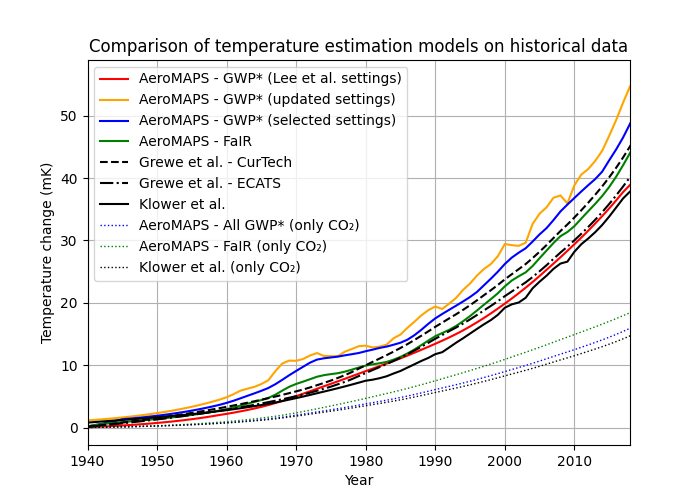

In [8]:
fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(
    data_years,
    1000
    * process_validation_historical_gwpstar20yr.data["climate_outputs"][
        "temperature_increase_from_aviation"
    ][0:80],
    color="red",
    label="AeroMAPS - GWP* (Lee et al. settings)",
    linestyle="-",
)
ax.plot(
    data_years,
    1000
    * process_validation_historical_gwpstar1yr.data["climate_outputs"][
        "temperature_increase_from_aviation"
    ][0:80],
    color="orange",
    label="AeroMAPS - GWP* (updated settings)",
    linestyle="-",
)
ax.plot(
    data_years,
    1000
    * process_validation_historical_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_aviation"
    ][0:80],
    color="blue",
    label="AeroMAPS - GWP* (selected settings)",
    linestyle="-",
)
ax.plot(
    data_years,
    1000
    * process_validation_historical_fair.data["climate_outputs"][
        "temperature_increase_from_aviation"
    ][0:80],
    color="green",
    label="AeroMAPS - FaIR",
    linestyle="-",
)
ax.plot(
    data_years,
    data_temperature_grewe_curtech,
    color="black",
    label="Grewe et al. - CurTech",
    linestyle="--",
)
ax.plot(
    data_years,
    data_temperature_grewe_ecats,
    color="black",
    label="Grewe et al. - ECATS",
    linestyle="-.",
)
ax.plot(data_years, data_temperature_klower, color="black", label="Klower et al.", linestyle="-")
ax.plot(
    data_years,
    1000
    * process_validation_historical_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][0:80],
    color="blue",
    label="AeroMAPS - All GWP* (only CO₂)",
    linestyle=":",
    linewidth=1,
)
ax.plot(
    data_years,
    1000
    * process_validation_historical_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][0:80],
    color="green",
    label="AeroMAPS - FaIR (only CO₂)",
    linestyle=":",
    linewidth=1,
)
ax.plot(
    data_years,
    data_temperature_klower_co2,
    color="black",
    label="Klower et al. (only CO₂)",
    linestyle=":",
    linewidth=1,
)
ax.set(
    xlabel="Year",
    ylabel="Temperature change (mK)",
    title="Comparison of temperature estimation models on historical data",
)
ax.grid()
plt.xlim(1940, 2018)
plt.legend()
plt.show()

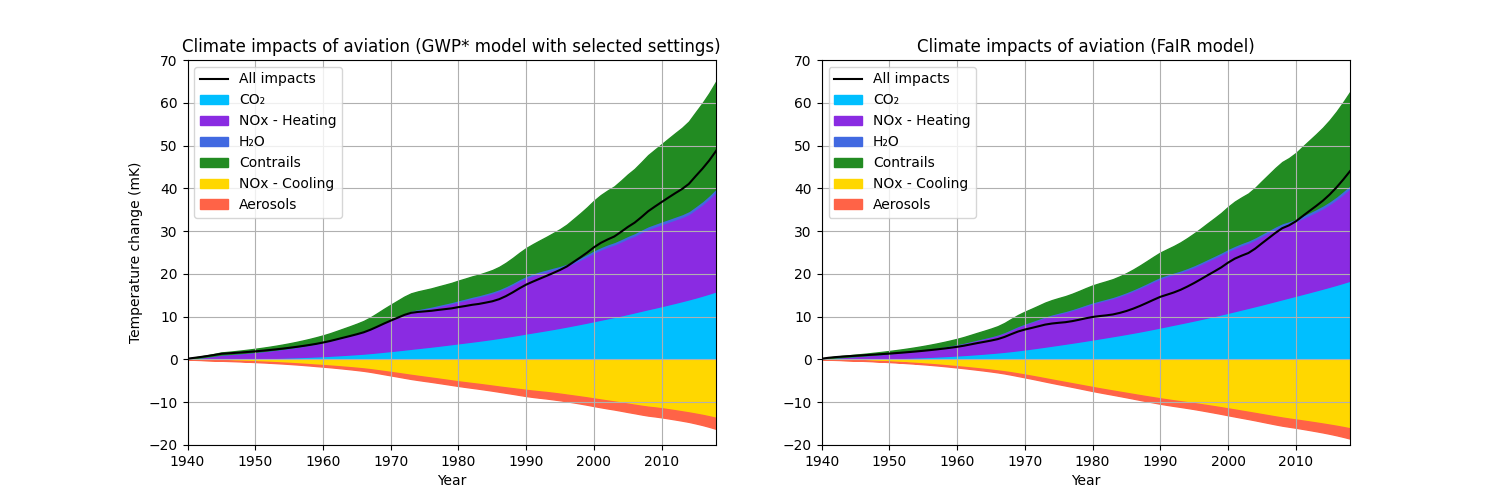

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(
    data_years,
    1000
    * process_validation_historical_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_aviation"
    ][0:80],
    color="black",
    label="All impacts",
    linestyle="-",
)
axs[0].fill_between(
    data_years,
    np.zeros(80),
    1000
    * process_validation_historical_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][0:80],
    color="deepskyblue",
    label="CO₂",
)
axs[0].fill_between(
    data_years,
    1000
    * process_validation_historical_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][0:80],
    1000
    * process_validation_historical_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][0:80]
    + 1000
    * process_validation_historical_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_nox_short_term_o3_increase_from_aviation"
    ][0:80],
    color="blueviolet",
    label="NOx - Heating",
)
axs[0].fill_between(
    data_years,
    1000
    * process_validation_historical_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][0:80]
    + 1000
    * process_validation_historical_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_nox_short_term_o3_increase_from_aviation"
    ][0:80],
    1000
    * process_validation_historical_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][0:80]
    + 1000
    * process_validation_historical_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_nox_short_term_o3_increase_from_aviation"
    ][0:80]
    + 1000
    * process_validation_historical_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_h2o_from_aviation"
    ][0:80],
    color="royalblue",
    label="H₂O",
)
axs[0].fill_between(
    data_years,
    1000
    * process_validation_historical_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][0:80]
    + 1000
    * process_validation_historical_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_nox_short_term_o3_increase_from_aviation"
    ][0:80]
    + 1000
    * process_validation_historical_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_h2o_from_aviation"
    ][0:80],
    1000
    * process_validation_historical_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][0:80]
    + 1000
    * process_validation_historical_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_nox_short_term_o3_increase_from_aviation"
    ][0:80]
    + 1000
    * process_validation_historical_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_h2o_from_aviation"
    ][0:80]
    + 1000
    * process_validation_historical_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_contrails_from_aviation"
    ][0:80],
    color="forestgreen",
    label="Contrails",
)
axs[0].fill_between(
    data_years,
    np.zeros(80),
    1000
    * (
        process_validation_historical_gwpstar6yr.data["climate_outputs"][
            "temperature_increase_from_nox_long_term_o3_decrease_from_aviation"
        ][0:80]
        + process_validation_historical_gwpstar6yr.data["climate_outputs"][
            "temperature_increase_from_nox_ch4_decrease_from_aviation"
        ][0:80]
        + process_validation_historical_gwpstar6yr.data["climate_outputs"][
            "temperature_increase_from_nox_stratospheric_water_vapor_decrease_from_aviation"
        ][0:80]
    ),
    color="gold",
    label="NOx - Cooling",
)
axs[0].fill_between(
    data_years,
    1000
    * (
        process_validation_historical_gwpstar6yr.data["climate_outputs"][
            "temperature_increase_from_nox_long_term_o3_decrease_from_aviation"
        ][0:80]
        + process_validation_historical_gwpstar6yr.data["climate_outputs"][
            "temperature_increase_from_nox_ch4_decrease_from_aviation"
        ][0:80]
        + process_validation_historical_gwpstar6yr.data["climate_outputs"][
            "temperature_increase_from_nox_stratospheric_water_vapor_decrease_from_aviation"
        ][0:80]
    ),
    1000
    * (
        process_validation_historical_gwpstar6yr.data["climate_outputs"][
            "temperature_increase_from_nox_long_term_o3_decrease_from_aviation"
        ][0:80]
        + process_validation_historical_gwpstar6yr.data["climate_outputs"][
            "temperature_increase_from_nox_ch4_decrease_from_aviation"
        ][0:80]
        + process_validation_historical_gwpstar6yr.data["climate_outputs"][
            "temperature_increase_from_nox_stratospheric_water_vapor_decrease_from_aviation"
        ][0:80]
    )
    + 1000
    * (
        process_validation_historical_gwpstar6yr.data["climate_outputs"][
            "temperature_increase_from_soot_from_aviation"
        ][0:80]
        + process_validation_historical_gwpstar6yr.data["climate_outputs"][
            "temperature_increase_from_sulfur_from_aviation"
        ][0:80]
    ),
    color="tomato",
    label="Aerosols",
)
axs[0].set(
    xlabel="Year",
    ylabel="Temperature change (mK)",
    title="Climate impacts of aviation (GWP* model with selected settings)",
)
axs[0].legend()

axs[1].plot(
    data_years,
    1000
    * process_validation_historical_fair.data["climate_outputs"][
        "temperature_increase_from_aviation"
    ][0:80],
    color="black",
    label="All impacts",
    linestyle="-",
)
axs[1].fill_between(
    data_years,
    np.zeros(80),
    1000
    * process_validation_historical_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][0:80],
    color="deepskyblue",
    label="CO₂",
)
axs[1].fill_between(
    data_years,
    1000
    * process_validation_historical_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][0:80],
    1000
    * process_validation_historical_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][0:80]
    + 1000
    * process_validation_historical_fair.data["climate_outputs"][
        "temperature_increase_from_nox_short_term_o3_increase_from_aviation"
    ][0:80],
    color="blueviolet",
    label="NOx - Heating",
)
axs[1].fill_between(
    data_years,
    1000
    * process_validation_historical_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][0:80]
    + 1000
    * process_validation_historical_fair.data["climate_outputs"][
        "temperature_increase_from_nox_short_term_o3_increase_from_aviation"
    ][0:80],
    1000
    * process_validation_historical_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][0:80]
    + 1000
    * process_validation_historical_fair.data["climate_outputs"][
        "temperature_increase_from_nox_short_term_o3_increase_from_aviation"
    ][0:80]
    + 1000
    * process_validation_historical_fair.data["climate_outputs"][
        "temperature_increase_from_h2o_from_aviation"
    ][0:80],
    color="royalblue",
    label="H₂O",
)
axs[1].fill_between(
    data_years,
    1000
    * process_validation_historical_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][0:80]
    + 1000
    * process_validation_historical_fair.data["climate_outputs"][
        "temperature_increase_from_nox_short_term_o3_increase_from_aviation"
    ][0:80]
    + 1000
    * process_validation_historical_fair.data["climate_outputs"][
        "temperature_increase_from_h2o_from_aviation"
    ][0:80],
    1000
    * process_validation_historical_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][0:80]
    + 1000
    * process_validation_historical_fair.data["climate_outputs"][
        "temperature_increase_from_nox_short_term_o3_increase_from_aviation"
    ][0:80]
    + 1000
    * process_validation_historical_fair.data["climate_outputs"][
        "temperature_increase_from_h2o_from_aviation"
    ][0:80]
    + 1000
    * process_validation_historical_fair.data["climate_outputs"][
        "temperature_increase_from_contrails_from_aviation"
    ][0:80],
    color="forestgreen",
    label="Contrails",
)
axs[1].fill_between(
    data_years,
    np.zeros(80),
    1000
    * (
        process_validation_historical_fair.data["climate_outputs"][
            "temperature_increase_from_nox_long_term_o3_decrease_from_aviation"
        ][0:80]
        + process_validation_historical_fair.data["climate_outputs"][
            "temperature_increase_from_nox_ch4_decrease_from_aviation"
        ][0:80]
        + process_validation_historical_fair.data["climate_outputs"][
            "temperature_increase_from_nox_stratospheric_water_vapor_decrease_from_aviation"
        ][0:80]
    ),
    color="gold",
    label="NOx - Cooling",
)
axs[1].fill_between(
    data_years,
    1000
    * (
        process_validation_historical_fair.data["climate_outputs"][
            "temperature_increase_from_nox_long_term_o3_decrease_from_aviation"
        ][0:80]
        + process_validation_historical_fair.data["climate_outputs"][
            "temperature_increase_from_nox_ch4_decrease_from_aviation"
        ][0:80]
        + process_validation_historical_fair.data["climate_outputs"][
            "temperature_increase_from_nox_stratospheric_water_vapor_decrease_from_aviation"
        ][0:80]
    ),
    1000
    * (
        process_validation_historical_fair.data["climate_outputs"][
            "temperature_increase_from_nox_long_term_o3_decrease_from_aviation"
        ][0:80]
        + process_validation_historical_fair.data["climate_outputs"][
            "temperature_increase_from_nox_ch4_decrease_from_aviation"
        ][0:80]
        + process_validation_historical_fair.data["climate_outputs"][
            "temperature_increase_from_nox_stratospheric_water_vapor_decrease_from_aviation"
        ][0:80]
    )
    + 1000
    * (
        process_validation_historical_fair.data["climate_outputs"][
            "temperature_increase_from_soot_from_aviation"
        ][0:80]
        + process_validation_historical_fair.data["climate_outputs"][
            "temperature_increase_from_sulfur_from_aviation"
        ][0:80]
    ),
    color="tomato",
    label="Aerosols",
)
axs[1].set(
    xlabel="Year",
    title="Climate impacts of aviation (FaIR model)",
)

axs[0].grid()
axs[1].grid()
axs[0].set_xlim(1940, 2018)
axs[0].set_ylim(-20, 70)
axs[1].set_xlim(1940, 2018)
axs[1].set_ylim(-20, 70)

plt.legend()
plt.show()

### 1.2. Comparison on prospective data

In order to validate the models more widely, various test cases are considered in the following. A first analysis is based on the study of different prospective scenarios produced by Klöwer et al., whose historical results were discussed above. 
Three radically different scenarios are studied: a first scenario assuming a post-COVID-19 recovery period from 2021 to 2024, followed by continued emission growth at a rate of 3%, another scenario with 0% emission growth after 2024, meaning emissions remain constant from that point onward, and a last scenario showing a long-term decline of 2.5% in emissions. These assumptions have been used for reproducing the scenarios with AeroMAPS.
From a qualitative point of view, different results are expected.
When emissions are stabilised (0% growth), the contribution of non-CO2 emissions remains constant, while warming due to CO2 emissions continues to grow as CO2 continues to accumulate. This highlights a clear distinction between the CO2 and non-CO2 effects. Indeed, to stabilise the warming due to CO2, emissions would need to be stopped, not just their growth. The figure below shows the different results in terms of temperature response.

In [10]:
# GWP* - 20 years
process_validation_prospective_backtonormal_gwpstar20yr = create_process(
    configuration_file="data_climate/config_validation_prospective_backtonormal.json",
    models=models_simple_gwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_validation_prospective_backtonormal_gwpstar20yr.compute()

# GWP* - 1 year
process_validation_prospective_backtonormal_gwpstar1yr = create_process(
    configuration_file="data_climate/config_validation_prospective_backtonormal.json",
    models=models_gwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_validation_prospective_backtonormal_gwpstar1yr.parameters.contrails_gwpstar_variation_duration = (
    1.0
)
process_validation_prospective_backtonormal_gwpstar1yr.parameters.nox_short_term_o3_increase_gwpstar_variation_duration = (
    1.0
)
process_validation_prospective_backtonormal_gwpstar1yr.parameters.soot_gwpstar_variation_duration = (
    1.0
)
process_validation_prospective_backtonormal_gwpstar1yr.parameters.h2o_gwpstar_variation_duration = (
    1.0
)
process_validation_prospective_backtonormal_gwpstar1yr.parameters.sulfur_gwpstar_variation_duration = (
    1.0
)
process_validation_prospective_backtonormal_gwpstar1yr.compute()

# GWP* - 6 years
process_validation_prospective_backtonormal_gwpstar6yr = create_process(
    configuration_file="data_climate/config_validation_prospective_backtonormal.json",
    models=models_gwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_validation_prospective_backtonormal_gwpstar6yr.parameters.contrails_gwpstar_variation_duration = (
    duration
)
process_validation_prospective_backtonormal_gwpstar6yr.parameters.nox_short_term_o3_increase_gwpstar_variation_duration = (
    duration
)
process_validation_prospective_backtonormal_gwpstar6yr.parameters.soot_gwpstar_variation_duration = (
    duration
)
process_validation_prospective_backtonormal_gwpstar6yr.parameters.h2o_gwpstar_variation_duration = (
    duration
)
process_validation_prospective_backtonormal_gwpstar6yr.parameters.sulfur_gwpstar_variation_duration = (
    duration
)
process_validation_prospective_backtonormal_gwpstar6yr.compute()

# FaIR
process_validation_prospective_backtonormal_fair = create_process(
    configuration_file="data_climate/config_validation_prospective_backtonormal.json",
    models=models_fair,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_validation_prospective_backtonormal_fair.compute()

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

In [11]:
# GWP* - 20 years
process_validation_prospective_zerogrowth_gwpstar20yr = create_process(
    configuration_file="data_climate/config_validation_prospective_zerogrowth.json",
    models=models_simple_gwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_validation_prospective_zerogrowth_gwpstar20yr.compute()

# GWP* - 1 year
process_validation_prospective_zerogrowth_gwpstar1yr = create_process(
    configuration_file="data_climate/config_validation_prospective_zerogrowth.json",
    models=models_gwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_validation_prospective_zerogrowth_gwpstar1yr.parameters.contrails_gwpstar_variation_duration = (
    1.0
)
process_validation_prospective_zerogrowth_gwpstar1yr.parameters.nox_short_term_o3_increase_gwpstar_variation_duration = (
    1.0
)
process_validation_prospective_zerogrowth_gwpstar1yr.parameters.soot_gwpstar_variation_duration = (
    1.0
)
process_validation_prospective_zerogrowth_gwpstar1yr.parameters.h2o_gwpstar_variation_duration = 1.0
process_validation_prospective_zerogrowth_gwpstar1yr.parameters.sulfur_gwpstar_variation_duration = (
    1.0
)
process_validation_prospective_zerogrowth_gwpstar1yr.compute()

# GWP* - 6 years
process_validation_prospective_zerogrowth_gwpstar6yr = create_process(
    configuration_file="data_climate/config_validation_prospective_zerogrowth.json",
    models=models_gwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_validation_prospective_zerogrowth_gwpstar6yr.parameters.contrails_gwpstar_variation_duration = (
    duration
)
process_validation_prospective_zerogrowth_gwpstar6yr.parameters.nox_short_term_o3_increase_gwpstar_variation_duration = (
    duration
)
process_validation_prospective_zerogrowth_gwpstar6yr.parameters.soot_gwpstar_variation_duration = (
    duration
)
process_validation_prospective_zerogrowth_gwpstar6yr.parameters.h2o_gwpstar_variation_duration = (
    duration
)
process_validation_prospective_zerogrowth_gwpstar6yr.parameters.sulfur_gwpstar_variation_duration = (
    duration
)
process_validation_prospective_zerogrowth_gwpstar6yr.compute()

# FaIR
process_validation_prospective_zerogrowth_fair = create_process(
    configuration_file="data_climate/config_validation_prospective_zerogrowth.json",
    models=models_fair,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_validation_prospective_zerogrowth_fair.compute()

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

In [12]:
# GWP* - 20 years
process_validation_prospective_longtermdecline_gwpstar20yr = create_process(
    configuration_file="data_climate/config_validation_prospective_longtermdecline.json",
    models=models_simple_gwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_validation_prospective_longtermdecline_gwpstar20yr.compute()

# GWP* - 1 year
process_validation_prospective_longtermdecline_gwpstar1yr = create_process(
    configuration_file="data_climate/config_validation_prospective_longtermdecline.json",
    models=models_gwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_validation_prospective_longtermdecline_gwpstar1yr.parameters.contrails_gwpstar_variation_duration = (
    1.0
)
process_validation_prospective_longtermdecline_gwpstar1yr.parameters.nox_short_term_o3_increase_gwpstar_variation_duration = (
    1.0
)
process_validation_prospective_longtermdecline_gwpstar1yr.parameters.soot_gwpstar_variation_duration = (
    1.0
)
process_validation_prospective_longtermdecline_gwpstar1yr.parameters.h2o_gwpstar_variation_duration = (
    1.0
)
process_validation_prospective_longtermdecline_gwpstar1yr.parameters.sulfur_gwpstar_variation_duration = (
    1.0
)
process_validation_prospective_longtermdecline_gwpstar1yr.compute()

# GWP* - 6 years
process_validation_prospective_longtermdecline_gwpstar6yr = create_process(
    configuration_file="data_climate/config_validation_prospective_longtermdecline.json",
    models=models_gwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_validation_prospective_longtermdecline_gwpstar6yr.parameters.contrails_gwpstar_variation_duration = (
    duration
)
process_validation_prospective_longtermdecline_gwpstar6yr.parameters.nox_short_term_o3_increase_gwpstar_variation_duration = (
    duration
)
process_validation_prospective_longtermdecline_gwpstar6yr.parameters.soot_gwpstar_variation_duration = (
    duration
)
process_validation_prospective_longtermdecline_gwpstar6yr.parameters.h2o_gwpstar_variation_duration = (
    duration
)
process_validation_prospective_longtermdecline_gwpstar6yr.parameters.sulfur_gwpstar_variation_duration = (
    duration
)
process_validation_prospective_longtermdecline_gwpstar6yr.compute()

# FaIR
process_validation_prospective_longtermdecline_fair = create_process(
    configuration_file="data_climate/config_validation_prospective_longtermdecline.json",
    models=models_fair,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_validation_prospective_longtermdecline_fair.compute()

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

#### Results

In [13]:
# Reference results
reference_temperature_prospective_data_df = read_csv(
    "data_climate/reference_temperature_change_prospective.csv", delimiter=";"
)
reference_temperature_prospective_data = reference_temperature_prospective_data_df.values
data_years_prospective = reference_temperature_prospective_data[:, 0]
data_temperature_3 = reference_temperature_prospective_data[:, 1]
data_temperature_0 = reference_temperature_prospective_data[:, 3]
data_temperature_m25 = reference_temperature_prospective_data[:, 5]

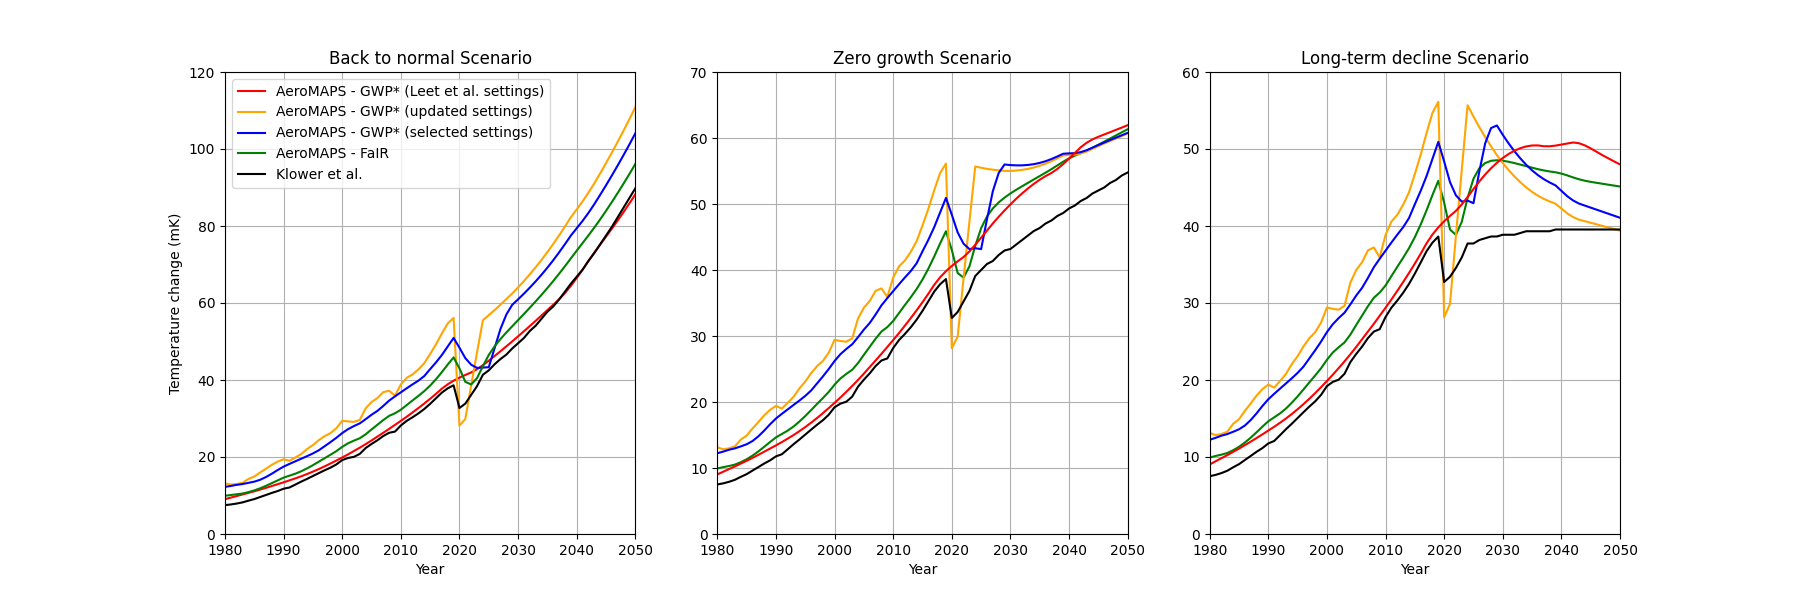

In [14]:
data_years_total = list(range(1940, 2101))

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

axs[0].plot(
    data_years_total,
    1000
    * process_validation_prospective_backtonormal_gwpstar20yr.data["climate_outputs"][
        "temperature_increase_from_aviation"
    ],
    color="red",
    label="AeroMAPS - GWP* (Leet et al. settings)",
    linestyle="-",
)
axs[0].plot(
    data_years_total,
    1000
    * process_validation_prospective_backtonormal_gwpstar1yr.data["climate_outputs"][
        "temperature_increase_from_aviation"
    ],
    color="orange",
    label="AeroMAPS - GWP* (updated settings)",
    linestyle="-",
)
axs[0].plot(
    data_years_total,
    1000
    * process_validation_prospective_backtonormal_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_aviation"
    ],
    color="blue",
    label="AeroMAPS - GWP* (selected settings)",
    linestyle="-",
)
axs[0].plot(
    data_years_total,
    1000
    * process_validation_prospective_backtonormal_fair.data["climate_outputs"][
        "temperature_increase_from_aviation"
    ],
    color="green",
    label="AeroMAPS - FaIR",
    linestyle="-",
)
axs[0].plot(
    data_years_prospective,
    data_temperature_3,
    color="black",
    label="Klower et al.",
    linestyle="-",
)
axs[0].legend()
axs[0].set(
    xlabel="Year",
    ylabel="Temperature change (mK)",
    title="Back to normal Scenario",
)

axs[1].plot(
    data_years_total,
    1000
    * process_validation_prospective_zerogrowth_fair.data["climate_outputs"][
        "temperature_increase_from_aviation"
    ],
    color="green",
    linestyle="-",
)
axs[1].plot(
    data_years_total,
    1000
    * process_validation_prospective_zerogrowth_gwpstar1yr.data["climate_outputs"][
        "temperature_increase_from_aviation"
    ],
    color="orange",
    linestyle="-",
)
axs[1].plot(
    data_years_total,
    1000
    * process_validation_prospective_zerogrowth_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_aviation"
    ],
    color="blue",
    linestyle="-",
)
axs[1].plot(
    data_years_total,
    1000
    * process_validation_prospective_zerogrowth_gwpstar20yr.data["climate_outputs"][
        "temperature_increase_from_aviation"
    ],
    color="red",
    linestyle="-",
)
axs[1].plot(
    data_years_prospective,
    data_temperature_0,
    color="black",
    linestyle="-",
)
axs[1].set(
    xlabel="Year",
    title="Zero growth Scenario",
)

axs[2].plot(
    data_years_total,
    1000
    * process_validation_prospective_longtermdecline_fair.data["climate_outputs"][
        "temperature_increase_from_aviation"
    ],
    color="green",
    linestyle="-",
)
axs[2].plot(
    data_years_total,
    1000
    * process_validation_prospective_longtermdecline_gwpstar1yr.data["climate_outputs"][
        "temperature_increase_from_aviation"
    ],
    color="orange",
    linestyle="-",
)
axs[2].plot(
    data_years_total,
    1000
    * process_validation_prospective_longtermdecline_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_aviation"
    ],
    color="blue",
    linestyle="-",
)
axs[2].plot(
    data_years_total,
    1000
    * process_validation_prospective_longtermdecline_gwpstar20yr.data["climate_outputs"][
        "temperature_increase_from_aviation"
    ],
    color="red",
    linestyle="-",
)
axs[2].plot(
    data_years_prospective,
    data_temperature_m25,
    color="black",
    linestyle="-",
)
axs[2].set(
    xlabel="Year",
    title="Long-term decline Scenario",
)

axs[0].grid()
axs[1].grid()
axs[2].grid()

axs[0].set_xlim(1980, 2050)
axs[0].set_ylim(0, 120)
axs[1].set_xlim(1980, 2050)
axs[1].set_ylim(0, 70)
axs[2].set_xlim(1980, 2050)
axs[2].set_ylim(0, 60)

plt.show()

### 1.3. Comparison on a sudden halt scenario

To explore models in more detail, a second analysis focuses on a sudden halt of aviation emissions, the first elements of which were provided by studying the response of models to COVID-19.
Although it may seem improbable, exploring such scenarios can be very useful for understanding the model's behaviour. However, there are very few studies in which such scenarios have been investigated. The figure below illustrates the aviation's contribution to temperature change, calculated using the different climate models developed for AeroMAPS, in a scenario where there are no further aviation emissions from 2050, after a stabilisation over 2024-2050.

In [15]:
# GWP* - 20 years
process_validation_suddenhalt_gwpstar20yr = create_process(
    configuration_file="data_climate/config_validation_suddenhalt.json",
    models=models_simple_gwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_validation_suddenhalt_gwpstar20yr.compute()

# GWP* - 1 year
process_validation_suddenhalt_gwpstar1yr = create_process(
    configuration_file="data_climate/config_validation_suddenhalt.json",
    models=models_gwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_validation_suddenhalt_gwpstar1yr.parameters.contrails_gwpstar_variation_duration = 1.0
process_validation_suddenhalt_gwpstar1yr.parameters.contrails_gwpstar_s_coefficient = 0.0
process_validation_suddenhalt_gwpstar1yr.parameters.nox_short_term_o3_increase_gwpstar_variation_duration = (
    1.0
)
process_validation_suddenhalt_gwpstar1yr.parameters.nox_short_term_o3_increase_gwpstar_s_coefficient = (
    0.0
)
process_validation_suddenhalt_gwpstar1yr.parameters.nox_long_term_o3_decrease_gwpstar_variation_duration = (
    20.0
)
process_validation_suddenhalt_gwpstar1yr.parameters.nox_long_term_o3_decrease_gwpstar_s_coefficient = (
    0.25
)
process_validation_suddenhalt_gwpstar1yr.parameters.nox_ch4_decrease_gwpstar_variation_duration = (
    20.0
)
process_validation_suddenhalt_gwpstar1yr.parameters.nox_ch4_decrease_gwpstar_s_coefficient = 0.25
process_validation_suddenhalt_gwpstar1yr.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_variation_duration = (
    20.0
)
process_validation_suddenhalt_gwpstar1yr.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_s_coefficient = (
    0.25
)
process_validation_suddenhalt_gwpstar1yr.parameters.soot_gwpstar_variation_duration = 1.0
process_validation_suddenhalt_gwpstar1yr.parameters.soot_gwpstar_s_coefficient = 0.0
process_validation_suddenhalt_gwpstar1yr.parameters.h2o_gwpstar_variation_duration = 1.0
process_validation_suddenhalt_gwpstar1yr.parameters.h2o_gwpstar_s_coefficient = 0.0
process_validation_suddenhalt_gwpstar1yr.parameters.sulfur_gwpstar_variation_duration = 1.0
process_validation_suddenhalt_gwpstar1yr.parameters.sulfur_gwpstar_s_coefficient = 0.0
process_validation_suddenhalt_gwpstar1yr.compute()

# GWP* - 6 years
process_validation_suddenhalt_gwpstar6yr = create_process(
    configuration_file="data_climate/config_validation_suddenhalt.json",
    models=models_gwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_validation_suddenhalt_gwpstar6yr.parameters.contrails_gwpstar_variation_duration = duration
process_validation_suddenhalt_gwpstar6yr.parameters.contrails_gwpstar_s_coefficient = 0.0
process_validation_suddenhalt_gwpstar6yr.parameters.nox_short_term_o3_increase_gwpstar_variation_duration = (
    duration
)
process_validation_suddenhalt_gwpstar6yr.parameters.nox_short_term_o3_increase_gwpstar_s_coefficient = (
    0.0
)
process_validation_suddenhalt_gwpstar6yr.parameters.nox_long_term_o3_decrease_gwpstar_variation_duration = (
    20.0
)
process_validation_suddenhalt_gwpstar6yr.parameters.nox_long_term_o3_decrease_gwpstar_s_coefficient = (
    0.25
)
process_validation_suddenhalt_gwpstar6yr.parameters.nox_ch4_decrease_gwpstar_variation_duration = (
    20.0
)
process_validation_suddenhalt_gwpstar6yr.parameters.nox_ch4_decrease_gwpstar_s_coefficient = 0.25
process_validation_suddenhalt_gwpstar6yr.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_variation_duration = (
    20.0
)
process_validation_suddenhalt_gwpstar6yr.parameters.nox_stratospheric_water_vapor_decrease_gwpstar_s_coefficient = (
    0.25
)
process_validation_suddenhalt_gwpstar6yr.parameters.soot_gwpstar_variation_duration = duration
process_validation_suddenhalt_gwpstar6yr.parameters.soot_gwpstar_s_coefficient = 0.0
process_validation_suddenhalt_gwpstar6yr.parameters.h2o_gwpstar_variation_duration = duration
process_validation_suddenhalt_gwpstar6yr.parameters.h2o_gwpstar_s_coefficient = 0.0
process_validation_suddenhalt_gwpstar6yr.parameters.sulfur_gwpstar_variation_duration = duration
process_validation_suddenhalt_gwpstar6yr.parameters.sulfur_gwpstar_s_coefficient = 0.0
process_validation_suddenhalt_gwpstar6yr.compute()

# FaIR
process_validation_suddenhalt_fair = create_process(
    configuration_file="data_climate/config_validation_suddenhalt.json",
    models=models_fair,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_validation_suddenhalt_fair.compute()

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

#### Results

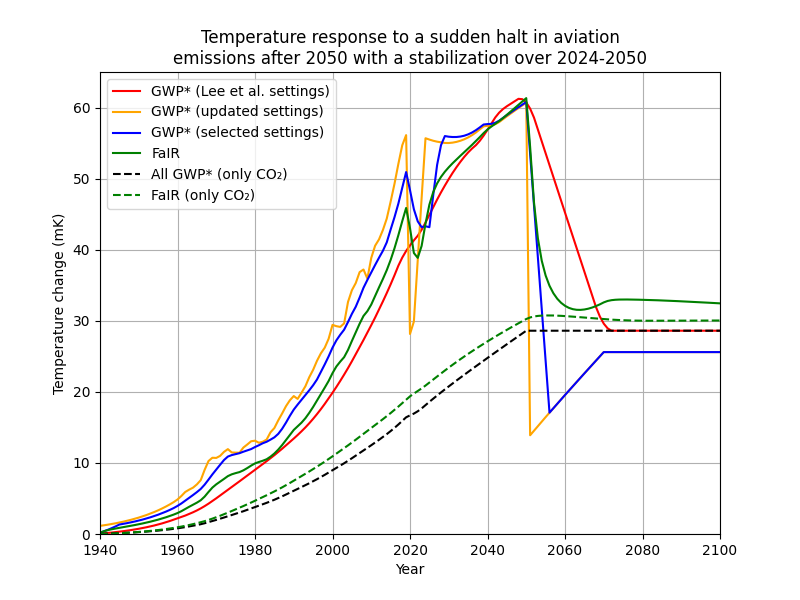

In [16]:
data_years_total = list(range(1940, 2101))

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(
    data_years_total,
    1000
    * process_validation_suddenhalt_gwpstar20yr.data["climate_outputs"][
        "temperature_increase_from_aviation"
    ],
    color="red",
    label="GWP* (Lee et al. settings)",
    linestyle="-",
)
ax.plot(
    data_years_total,
    1000
    * process_validation_suddenhalt_gwpstar1yr.data["climate_outputs"][
        "temperature_increase_from_aviation"
    ],
    color="orange",
    label="GWP* (updated settings)",
    linestyle="-",
)

ax.plot(
    data_years_total,
    1000
    * process_validation_suddenhalt_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_aviation"
    ],
    color="blue",
    label="GWP* (selected settings)",
    linestyle="-",
)
ax.plot(
    data_years_total,
    1000
    * process_validation_suddenhalt_fair.data["climate_outputs"][
        "temperature_increase_from_aviation"
    ],
    color="green",
    label="FaIR",
    linestyle="-",
)
ax.plot(
    data_years_total,
    1000
    * process_validation_suddenhalt_gwpstar6yr.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ],
    color="black",
    label="All GWP* (only CO₂)",
    linestyle="--",
)
ax.plot(
    data_years_total,
    1000
    * process_validation_suddenhalt_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ],
    color="green",
    label="FaIR (only CO₂)",
    linestyle="--",
)

ax.set(
    xlabel="Year",
    ylabel="Temperature change (mK)",
    title="Temperature response to a sudden halt in aviation\nemissions after 2050 with a stabilization over 2024-2050",
)

ax.grid()
plt.xlim(1940, 2100)
plt.ylim(0, 65)
plt.legend()
plt.show()

In order to calibrate the GWP* method, the following plot has been used. Using the calibrated value of 20 years for methane in the standard GWP* method, we see a 60% drop in the contribution to the rise in temperature after emissions have stopped. Using the same approach, a period of 6 years has therefore been chosen for the other non-CO2 effects of aviation.

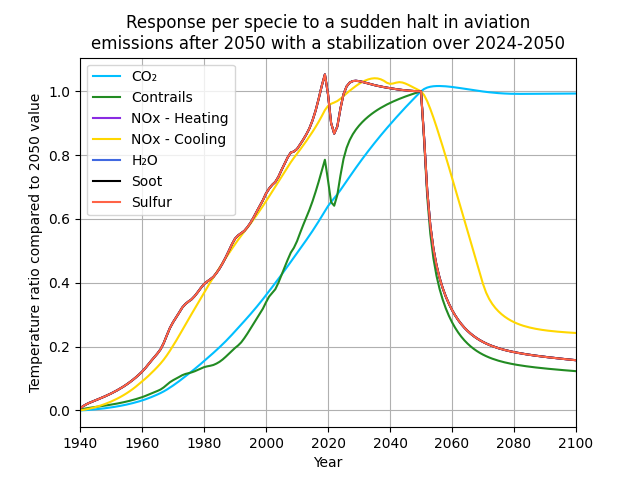

In [17]:
fig, ax = plt.subplots()
ax.plot(
    data_years_total,
    process_validation_suddenhalt_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ]
    / process_validation_suddenhalt_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][2050],
    color="deepskyblue",
    label="CO₂",
    linestyle="-",
)
ax.plot(
    data_years_total,
    process_validation_suddenhalt_fair.data["climate_outputs"][
        "temperature_increase_from_contrails_from_aviation"
    ]
    / process_validation_suddenhalt_fair.data["climate_outputs"][
        "temperature_increase_from_contrails_from_aviation"
    ][2050],
    color="forestgreen",
    label="Contrails",
    linestyle="-",
)
ax.plot(
    data_years_total,
    process_validation_suddenhalt_fair.data["climate_outputs"][
        "temperature_increase_from_nox_short_term_o3_increase_from_aviation"
    ]
    / process_validation_suddenhalt_fair.data["climate_outputs"][
        "temperature_increase_from_nox_short_term_o3_increase_from_aviation"
    ][2050],
    color="blueviolet",
    label="NOx - Heating",
    linestyle="-",
)
ax.plot(
    data_years_total,
    (
        process_validation_suddenhalt_fair.data["climate_outputs"][
            "temperature_increase_from_nox_long_term_o3_decrease_from_aviation"
        ]
        + process_validation_suddenhalt_fair.data["climate_outputs"][
            "temperature_increase_from_nox_ch4_decrease_from_aviation"
        ]
        + process_validation_suddenhalt_fair.data["climate_outputs"][
            "temperature_increase_from_nox_stratospheric_water_vapor_decrease_from_aviation"
        ]
    )
    / (
        process_validation_suddenhalt_fair.data["climate_outputs"][
            "temperature_increase_from_nox_long_term_o3_decrease_from_aviation"
        ][2050]
        + process_validation_suddenhalt_fair.data["climate_outputs"][
            "temperature_increase_from_nox_ch4_decrease_from_aviation"
        ][2050]
        + process_validation_suddenhalt_fair.data["climate_outputs"][
            "temperature_increase_from_nox_stratospheric_water_vapor_decrease_from_aviation"
        ][2050]
    ),
    color="gold",
    label="NOx - Cooling",
    linestyle="-",
)
ax.plot(
    data_years_total,
    process_validation_suddenhalt_fair.data["climate_outputs"][
        "temperature_increase_from_h2o_from_aviation"
    ]
    / process_validation_suddenhalt_fair.data["climate_outputs"][
        "temperature_increase_from_h2o_from_aviation"
    ][2050],
    color="royalblue",
    label="H₂O",
    linestyle="-",
)
ax.plot(
    data_years_total,
    process_validation_suddenhalt_fair.data["climate_outputs"][
        "temperature_increase_from_soot_from_aviation"
    ]
    / process_validation_suddenhalt_fair.data["climate_outputs"][
        "temperature_increase_from_soot_from_aviation"
    ][2050],
    color="black",
    label="Soot",
    linestyle="-",
)
ax.plot(
    data_years_total,
    process_validation_suddenhalt_fair.data["climate_outputs"][
        "temperature_increase_from_sulfur_from_aviation"
    ]
    / process_validation_suddenhalt_fair.data["climate_outputs"][
        "temperature_increase_from_sulfur_from_aviation"
    ][2050],
    color="tomato",
    label="Sulfur",
    linestyle="-",
)


ax.set(
    xlabel="Year",
    ylabel="Temperature ratio compared to 2050 value",
    title="Response per specie to a sudden halt in aviation\nemissions after 2050 with a stabilization over 2024-2050",
)

ax.grid()
plt.xlim(1940, 2100)
plt.legend()
plt.show()

## 2. Applications

The models studied previously are used for exploring the climate impacts of mitigation scenarios for air transport. Only the FaIR approach, and occasionally the GWP* one using the selected settings, are used in this section due to their better performance. First, several illustrative scenarios are presented and analysed. Second, the scenarios are classified based on their temperature response and several climate metrics are estimated. 

Sensitivity analyses are not represented here for reasons of simplicity, but the user can change the climate sensitivities directly into the code for obtaining the results. The air traffic growth rate can also be changed easily.

### 2.1. Mitigation scenarios

In this section, three illustrative scenarios are considered in order to highlight the possible uses and results of these lightweight climate models in the context of aviation prospective studies. In addition to a baseline scenario, two mitigation ones are considered: one is based on the use of low-carbon fuels, while the other relies on the deployment of contrail avoidance strategies. These scenarios are simulated with AeroMAPS, and their climate impacts are evaluated using the FaIR method. Analyses at the temperature level facilitate the comparison of the short and long-term impacts.

For all the scenarios, the future air traffic growth is fixed at 3% per year, according to current forecasts used by the Air Transport Action Group (ATAG). For reasons of simplicity, efficiency gains are not included in this study. The first mitigation scenario assumes 100% low-carbon aviation fuels by 2050, 50% biofuel and 50% electrofuel, with a gradual implementation starting from 2030. Life-cycle emissions, from biofuel (using Fischer-Tropsch pathway from residues) and electrofuel production (using dedicated renewable electricity considering a emission factor of 10gCO2/kWh), are considered, leading to CO2 emission reduction greater than 90%. The second mitigation scenario keeps using exclusively fossil fuel, but shows the effect of avoiding 80% of contrails by 2040, starting the implementation of operational measures in 2030, and considering a 2% fleet-level overconsumption caused by modifying the flight plans in order to avoid persistent contrail formation regions. This hypothesis is an arbitrary target derived from the Pareto front of avoided contrails versus overconsumptions, proposed by Matthes et al., keeping in mind that the feasibility of successful deployment of contrails mitigation measures at global scale, and the efficiency of such schemes, still remain to be proven.

In [18]:
growth = 3.0

In [19]:
# FaIR
process_application_illustrative_fair = create_process(
    configuration_file="data_climate/config_application_illustrative.json",
    models=models_fair,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_application_illustrative_fair.compute()

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

In [20]:
# GWP* - 6 years
process_application_trend_gwpstar6yr = create_process(
    configuration_file="data_climate/config_application_trend.json",
    models=models_gwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_application_trend_gwpstar6yr.parameters.cagr_passenger_short_range_reference_periods_values = [
    growth
]
process_application_trend_gwpstar6yr.parameters.cagr_passenger_medium_range_reference_periods_values = [
    growth
]
process_application_trend_gwpstar6yr.parameters.cagr_passenger_long_range_reference_periods_values = [
    growth
]
process_application_trend_gwpstar6yr.parameters.cagr_freight_reference_periods_values = [growth]
process_application_trend_gwpstar6yr.compute()

# FaIR
process_application_trend_fair = create_process(
    configuration_file="data_climate/config_application_trend.json",
    models=models_fair,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_application_trend_fair.parameters.cagr_passenger_short_range_reference_periods_values = [
    growth
]
process_application_trend_fair.parameters.cagr_passenger_medium_range_reference_periods_values = [
    growth
]
process_application_trend_fair.parameters.cagr_passenger_long_range_reference_periods_values = [
    growth
]
process_application_trend_fair.parameters.cagr_freight_reference_periods_values = [growth]
process_application_trend_fair.compute()

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

In [21]:
# GWP* - 6 years
process_application_lcfuel_gwpstar6yr = create_process(
    configuration_file="data_climate/config_application_lcfuel.json",
    models=models_gwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_application_lcfuel_gwpstar6yr.parameters.cagr_passenger_short_range_reference_periods_values = [
    growth
]
process_application_lcfuel_gwpstar6yr.parameters.cagr_passenger_medium_range_reference_periods_values = [
    growth
]
process_application_lcfuel_gwpstar6yr.parameters.cagr_passenger_long_range_reference_periods_values = [
    growth
]
process_application_lcfuel_gwpstar6yr.parameters.cagr_freight_reference_periods_values = [growth]
process_application_lcfuel_gwpstar6yr.compute()

# FaIR
process_application_lcfuel_fair = create_process(
    configuration_file="data_climate/config_application_lcfuel.json",
    models=models_fair,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_application_lcfuel_fair.parameters.cagr_passenger_short_range_reference_periods_values = [
    growth
]
process_application_lcfuel_fair.parameters.cagr_passenger_medium_range_reference_periods_values = [
    growth
]
process_application_lcfuel_fair.parameters.cagr_passenger_long_range_reference_periods_values = [
    growth
]
process_application_lcfuel_fair.parameters.cagr_freight_reference_periods_values = [growth]
process_application_lcfuel_fair.compute()

# Sensitivity to contrails - Low
process_application_lcfuel_lowcontrails_fair = create_process(
    configuration_file="data_climate/config_application_lcfuel.json",
    models=models_fair,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_application_lcfuel_lowcontrails_fair.parameters.cagr_passenger_short_range_reference_periods_values = [
    growth
]
process_application_lcfuel_lowcontrails_fair.parameters.cagr_passenger_medium_range_reference_periods_values = [
    growth
]
process_application_lcfuel_lowcontrails_fair.parameters.cagr_passenger_long_range_reference_periods_values = [
    growth
]
process_application_lcfuel_lowcontrails_fair.parameters.cagr_freight_reference_periods_values = [
    growth
]
process_application_lcfuel_lowcontrails_fair.parameters.erf_coefficient_contrails = (
    1.058e-09 * 17 / 57.4
)
process_application_lcfuel_lowcontrails_fair.compute()

# Sensitivity to contrails - High
process_application_lcfuel_highcontrails_fair = create_process(
    configuration_file="data_climate/config_application_lcfuel.json",
    models=models_fair,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_application_lcfuel_highcontrails_fair.parameters.cagr_passenger_short_range_reference_periods_values = [
    growth
]
process_application_lcfuel_highcontrails_fair.parameters.cagr_passenger_medium_range_reference_periods_values = [
    growth
]
process_application_lcfuel_highcontrails_fair.parameters.cagr_passenger_long_range_reference_periods_values = [
    growth
]
process_application_lcfuel_highcontrails_fair.parameters.cagr_freight_reference_periods_values = [
    growth
]
process_application_lcfuel_highcontrails_fair.parameters.erf_coefficient_contrails = (
    1.058e-09 * 98 / 57.4
)
process_application_lcfuel_highcontrails_fair.compute()

/Users/s.delbecq/PycharmProjects/AeroMAPS/aeromaps/models/base.py:74: UserWarning: Warning Message - Model name: dropin_fuel_distribution - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
/Users/s.delbecq/PycharmProjects/AeroMAPS/aeromaps/models/base.py:74: UserWarning: Warning Message - Model name: dropin_fuel_distribution - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
/Users/s.delbecq/PycharmProjects/AeroMAPS/aeromaps/models/base.py:74: UserWarning: Warning Message - Model name: dropin_fuel_distribution - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the valu

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

/Users/s.delbecq/PycharmProjects/AeroMAPS/aeromaps/models/base.py:74: UserWarning: Warning Message - Model name: dropin_fuel_distribution - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
/Users/s.delbecq/PycharmProjects/AeroMAPS/aeromaps/models/base.py:74: UserWarning: Warning Message - Model name: dropin_fuel_distribution - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(


Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

/Users/s.delbecq/PycharmProjects/AeroMAPS/aeromaps/models/base.py:74: UserWarning: Warning Message - Model name: dropin_fuel_distribution - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(
/Users/s.delbecq/PycharmProjects/AeroMAPS/aeromaps/models/base.py:74: UserWarning: Warning Message - Model name: dropin_fuel_distribution - Warning on AeromapsInterpolationFunction: The last reference year for the interpolation is lower than end_year, the value associated to the last reference year is therefore used as a constant for the upper years.
  warnings.warn(


Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

In [22]:
# GWP* - 6 years
process_application_operations_gwpstar6yr = create_process(
    configuration_file="data_climate/config_application_operations.json",
    models=models_gwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_application_operations_gwpstar6yr.parameters.cagr_passenger_short_range_reference_periods_values = [
    growth
]
process_application_operations_gwpstar6yr.parameters.cagr_passenger_medium_range_reference_periods_values = [
    growth
]
process_application_operations_gwpstar6yr.parameters.cagr_passenger_long_range_reference_periods_values = [
    growth
]
process_application_operations_gwpstar6yr.parameters.cagr_freight_reference_periods_values = [
    growth
]
process_application_operations_gwpstar6yr.compute()

# FaIR
process_application_operations_fair = create_process(
    configuration_file="data_climate/config_application_operations.json",
    models=models_fair,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_application_operations_fair.parameters.cagr_passenger_short_range_reference_periods_values = [
    growth
]
process_application_operations_fair.parameters.cagr_passenger_medium_range_reference_periods_values = [
    growth
]
process_application_operations_fair.parameters.cagr_passenger_long_range_reference_periods_values = [
    growth
]
process_application_operations_fair.parameters.cagr_freight_reference_periods_values = [growth]
process_application_operations_fair.compute()

# Sensitivity to contrails - Low
process_application_operations_lowcontrails_fair = create_process(
    configuration_file="data_climate/config_application_operations.json",
    models=models_fair,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_application_operations_lowcontrails_fair.parameters.cagr_passenger_short_range_reference_periods_values = [
    growth
]
process_application_operations_lowcontrails_fair.parameters.cagr_passenger_medium_range_reference_periods_values = [
    growth
]
process_application_operations_lowcontrails_fair.parameters.cagr_passenger_long_range_reference_periods_values = [
    growth
]
process_application_operations_lowcontrails_fair.parameters.cagr_freight_reference_periods_values = [
    growth
]
process_application_operations_lowcontrails_fair.parameters.erf_coefficient_contrails = (
    1.058e-09 * 17 / 57.4
)
process_application_operations_lowcontrails_fair.compute()

# Sensitivity to contrails - High
process_application_operations_highcontrails_fair = create_process(
    configuration_file="data_climate/config_application_operations.json",
    models=models_fair,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_application_operations_highcontrails_fair.parameters.cagr_passenger_short_range_reference_periods_values = [
    growth
]
process_application_operations_highcontrails_fair.parameters.cagr_passenger_medium_range_reference_periods_values = [
    growth
]
process_application_operations_highcontrails_fair.parameters.cagr_passenger_long_range_reference_periods_values = [
    growth
]
process_application_operations_highcontrails_fair.parameters.cagr_freight_reference_periods_values = [
    growth
]
process_application_operations_highcontrails_fair.parameters.erf_coefficient_contrails = (
    1.058e-09 * 98 / 57.4
)
process_application_operations_highcontrails_fair.compute()

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

Running 1 projections in parallel:   0%|          | 0/335 [00:00<?, ?timesteps/s]

In [23]:
# GWP* - 6 years
process_application_lcfuel_operations_gwpstar6yr = create_process(
    configuration_file="data_climate/config_application_lcfuel_operations.json",
    models=models_gwpstar,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_application_lcfuel_operations_gwpstar6yr.parameters.cagr_passenger_short_range_reference_periods_values = [
    growth
]
process_application_lcfuel_operations_gwpstar6yr.parameters.cagr_passenger_medium_range_reference_periods_values = [
    growth
]
process_application_lcfuel_operations_gwpstar6yr.parameters.cagr_passenger_long_range_reference_periods_values = [
    growth
]
process_application_lcfuel_operations_gwpstar6yr.parameters.cagr_freight_reference_periods_values = [
    growth
]
process_application_lcfuel_operations_gwpstar6yr.compute()

# FaIR
process_application_lcfuel_operations_fair = create_process(
    configuration_file="data_climate/config_application_lcfuel_operations.json",
    models=models_fair,
    use_fleet_model=True,
    add_examples_aircraft_and_subcategory=False,
)
process_application_lcfuel_operations_fair.parameters.cagr_passenger_short_range_reference_periods_values = [
    growth
]
process_application_lcfuel_operations_fair.parameters.cagr_passenger_medium_range_reference_periods_values = [
    growth
]
process_application_lcfuel_operations_fair.parameters.cagr_passenger_long_range_reference_periods_values = [
    growth
]
process_application_lcfuel_operations_fair.parameters.cagr_freight_reference_periods_values = [
    growth
]
process_application_lcfuel_operations_fair.compute()

OSError: [Errno 28] No space left on device

#### Results

In [ ]:
data_years_total = list(range(1940, 2101))

fig, ax = plt.subplots()

ax.plot(
    data_years_total,
    1000
    * process_application_trend_fair.data["climate_outputs"]["temperature_increase_from_aviation"],
    color="red",
    label="Trend",
    linestyle="-",
)

ax.plot(
    data_years_total,
    1000
    * process_application_trend_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ],
    color="red",
    label="Trend (CO₂)",
    linestyle="--",
)

ax.plot(
    data_years_total,
    1000
    * process_application_lcfuel_fair.data["climate_outputs"]["temperature_increase_from_aviation"],
    color="blue",
    label="Low-carbon fuel",
    linestyle="-",
)

ax.plot(
    data_years_total,
    1000
    * process_application_lcfuel_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ],
    color="blue",
    label="Low-carbon fuel (CO₂)",
    linestyle="--",
)

ax.plot(
    data_years_total,
    1000
    * process_application_operations_fair.data["climate_outputs"][
        "temperature_increase_from_aviation"
    ],
    color="green",
    label="Operations",
    linestyle="-",
)

ax.plot(
    data_years_total,
    1000
    * process_application_operations_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ],
    color="green",
    label="Operations (CO₂)",
    linestyle="--",
)

ax.set(
    xlabel="Year",
    ylabel="Temperature change (mK)",
    title="Comparison of mitigation strategies",
)

ax.grid()
plt.xlim(1940, 2100)
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()
barWidth = 0.85
legend = ["Trend", "Low-carbon fuel", "Operations"]
ax.bar(
    legend[0],
    1000
    * (
        process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][2100]
        - process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][2024]
    ),
    color="deepskyblue",
)
ax.bar(
    legend[1],
    1000
    * (
        process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][2100]
        - process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][2024]
    ),
    color="deepskyblue",
)
ax.bar(
    legend[2],
    1000
    * (
        process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][2100]
        - process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][2024]
    ),
    color="deepskyblue",
    label="CO₂",
)

ax.bar(
    legend[0],
    1000
    * (
        process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_contrails_from_aviation"
        ][2100]
        - process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_contrails_from_aviation"
        ][2024]
    ),
    bottom=1000
    * (
        process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][2100]
        - process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][2024]
    ),
    color="forestgreen",
    label="Contrails",
)
ax.bar(
    legend[1],
    1000
    * (
        process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_contrails_from_aviation"
        ][2100]
        - process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_contrails_from_aviation"
        ][2024]
    ),
    bottom=1000
    * (
        process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][2100]
        - process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][2024]
    ),
    color="forestgreen",
)
ax.bar(
    legend[2],
    1000
    * (
        process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_contrails_from_aviation"
        ][2100]
        - process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_contrails_from_aviation"
        ][2024]
    ),
    bottom=1000
    * (
        process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][2100]
        - process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][2024]
    ),
    color="forestgreen",
)

ax.bar(
    legend[0],
    1000
    * (
        process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_nox_short_term_o3_increase_from_aviation"
        ][2100]
        - process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_nox_short_term_o3_increase_from_aviation"
        ][2024]
    )
    + 1000
    * (
        process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_nox_long_term_o3_decrease_from_aviation"
        ][2100]
        - process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_nox_long_term_o3_decrease_from_aviation"
        ][2024]
    )
    + 1000
    * (
        process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_nox_ch4_decrease_from_aviation"
        ][2100]
        - process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_nox_ch4_decrease_from_aviation"
        ][2024]
    )
    + 1000
    * (
        process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_nox_stratospheric_water_vapor_decrease_from_aviation"
        ][2100]
        - process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_nox_stratospheric_water_vapor_decrease_from_aviation"
        ][2024]
    ),
    bottom=1000
    * (
        process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][2100]
        - process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][2024]
    )
    + 1000
    * (
        process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_contrails_from_aviation"
        ][2100]
        - process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_contrails_from_aviation"
        ][2024]
    ),
    color="violet",
    label="Net NOx",
)
ax.bar(
    legend[1],
    1000
    * (
        process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_nox_short_term_o3_increase_from_aviation"
        ][2100]
        - process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_nox_short_term_o3_increase_from_aviation"
        ][2024]
    )
    + 1000
    * (
        process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_nox_long_term_o3_decrease_from_aviation"
        ][2100]
        - process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_nox_long_term_o3_decrease_from_aviation"
        ][2024]
    )
    + 1000
    * (
        process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_nox_ch4_decrease_from_aviation"
        ][2100]
        - process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_nox_ch4_decrease_from_aviation"
        ][2024]
    )
    + 1000
    * (
        process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_nox_stratospheric_water_vapor_decrease_from_aviation"
        ][2100]
        - process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_nox_stratospheric_water_vapor_decrease_from_aviation"
        ][2024]
    ),
    bottom=1000
    * (
        process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][2100]
        - process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][2024]
    )
    + 1000
    * (
        process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_contrails_from_aviation"
        ][2100]
        - process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_contrails_from_aviation"
        ][2024]
    ),
    color="violet",
)
ax.bar(
    legend[2],
    1000
    * (
        process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_nox_short_term_o3_increase_from_aviation"
        ][2100]
        - process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_nox_short_term_o3_increase_from_aviation"
        ][2024]
    )
    + 1000
    * (
        process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_nox_long_term_o3_decrease_from_aviation"
        ][2100]
        - process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_nox_long_term_o3_decrease_from_aviation"
        ][2024]
    )
    + 1000
    * (
        process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_nox_ch4_decrease_from_aviation"
        ][2100]
        - process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_nox_ch4_decrease_from_aviation"
        ][2024]
    )
    + 1000
    * (
        process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_nox_stratospheric_water_vapor_decrease_from_aviation"
        ][2100]
        - process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_nox_stratospheric_water_vapor_decrease_from_aviation"
        ][2024]
    ),
    bottom=1000
    * (
        process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][2100]
        - process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][2024]
    )
    + 1000
    * (
        process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_contrails_from_aviation"
        ][2100]
        - process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_contrails_from_aviation"
        ][2024]
    ),
    color="violet",
)

ax.bar(
    legend[0],
    1000
    * (
        process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_h2o_from_aviation"
        ][2100]
        - process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_h2o_from_aviation"
        ][2024]
    )
    + 1000
    * (
        process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_soot_from_aviation"
        ][2100]
        - process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_soot_from_aviation"
        ][2024]
    )
    + 1000
    * (
        process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_sulfur_from_aviation"
        ][2100]
        - process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_sulfur_from_aviation"
        ][2024]
    ),
    color="grey",
    label="Others",
)
ax.bar(
    legend[1],
    1000
    * (
        process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_h2o_from_aviation"
        ][2100]
        - process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_h2o_from_aviation"
        ][2024]
    )
    + 1000
    * (
        process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_soot_from_aviation"
        ][2100]
        - process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_soot_from_aviation"
        ][2024]
    )
    + 1000
    * (
        process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_sulfur_from_aviation"
        ][2100]
        - process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_sulfur_from_aviation"
        ][2024]
    ),
    bottom=1000
    * (
        process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_aviation"
        ][2100]
        - process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_aviation"
        ][2024]
    )
    - 1000
    * (
        process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_h2o_from_aviation"
        ][2100]
        - process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_h2o_from_aviation"
        ][2024]
    )
    - 1000
    * (
        process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_soot_from_aviation"
        ][2100]
        - process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_soot_from_aviation"
        ][2024]
    )
    - 1000
    * (
        process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_sulfur_from_aviation"
        ][2100]
        - process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_sulfur_from_aviation"
        ][2024]
    ),
    color="grey",
)
ax.bar(
    legend[2],
    1000
    * (
        process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_h2o_from_aviation"
        ][2100]
        - process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_h2o_from_aviation"
        ][2024]
    )
    + 1000
    * (
        process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_soot_from_aviation"
        ][2100]
        - process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_soot_from_aviation"
        ][2024]
    )
    + 1000
    * (
        process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_sulfur_from_aviation"
        ][2100]
        - process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_sulfur_from_aviation"
        ][2024]
    ),
    color="grey",
)

ax.set(
    ylabel="Temperature change (mK)",
    title="Contributions to temperature change over 2024-2100",
)

plt.legend()

In addition to the previous results, it is also interesting to compare the scenario on the figure below, showing the evolution of temperature change from CO2 emissions and non-CO2 effects. The concept of temperature multiplier is introduced, allowing the start of a discussion on climate metrics.

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.fill_between(
    1000
    * process_application_lcfuel_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ],
    1000
    * process_application_lcfuel_lowcontrails_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ],
    1000
    * process_application_lcfuel_highcontrails_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ],
    color="lightblue",
    alpha=0.5,
    linewidth=0,
)

ax.fill_between(
    1000
    * process_application_operations_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ],
    1000
    * process_application_operations_lowcontrails_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ],
    1000
    * process_application_operations_highcontrails_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ],
    color="lightgreen",
    alpha=0.5,
    linewidth=0,
)


ax.plot(
    1000
    * process_application_illustrative_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ],
    1000
    * process_application_illustrative_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ],
    color="orange",
    label="Illustrative",
    linestyle="-",
)
ax.scatter(
    1000
    * process_application_illustrative_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][2019],
    1000
    * process_application_illustrative_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ][2019],
    color="orange",
)
ax.scatter(
    1000
    * process_application_illustrative_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][2040],
    1000
    * process_application_illustrative_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ][2040],
    color="orange",
)
ax.scatter(
    1000
    * process_application_illustrative_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][2060],
    1000
    * process_application_illustrative_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ][2060],
    color="orange",
)
ax.scatter(
    1000
    * process_application_illustrative_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][2080],
    1000
    * process_application_illustrative_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ][2080],
    color="orange",
)
ax.scatter(
    1000
    * process_application_illustrative_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][2100],
    1000
    * process_application_illustrative_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ][2100],
    color="orange",
)

ax.plot(
    1000
    * process_application_lcfuel_operations_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ],
    1000
    * process_application_lcfuel_operations_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ],
    color="purple",
    label="Low-carbon fuel + Operations",
    linestyle="-",
)
ax.scatter(
    1000
    * process_application_lcfuel_operations_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][2040],
    1000
    * process_application_lcfuel_operations_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ][2040],
    color="purple",
)
ax.scatter(
    1000
    * process_application_lcfuel_operations_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][2060],
    1000
    * process_application_lcfuel_operations_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ][2060],
    color="purple",
)
ax.scatter(
    1000
    * process_application_lcfuel_operations_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][2080],
    1000
    * process_application_lcfuel_operations_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ][2080],
    color="purple",
)
ax.scatter(
    1000
    * process_application_lcfuel_operations_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][2100],
    1000
    * process_application_lcfuel_operations_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ][2100],
    color="purple",
)

ax.plot(
    1000
    * process_application_operations_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ],
    1000
    * process_application_operations_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ],
    color="green",
    label="Operations",
    linestyle="-",
)
ax.scatter(
    1000
    * process_application_operations_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][2040],
    1000
    * process_application_operations_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ][2040],
    color="green",
)
ax.scatter(
    1000
    * process_application_operations_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][2060],
    1000
    * process_application_operations_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ][2060],
    color="green",
)
ax.scatter(
    1000
    * process_application_operations_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][2080],
    1000
    * process_application_operations_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ][2080],
    color="green",
)
ax.scatter(
    1000
    * process_application_operations_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][2100],
    1000
    * process_application_operations_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ][2100],
    color="green",
)

ax.plot(
    1000
    * process_application_lcfuel_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ],
    1000
    * process_application_lcfuel_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ],
    color="blue",
    label="Low-carbon fuel",
    linestyle="-",
)
ax.scatter(
    1000
    * process_application_lcfuel_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][2040],
    1000
    * process_application_lcfuel_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ][2040],
    color="blue",
)
ax.scatter(
    1000
    * process_application_lcfuel_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][2060],
    1000
    * process_application_lcfuel_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ][2060],
    color="blue",
)
ax.scatter(
    1000
    * process_application_lcfuel_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][2080],
    1000
    * process_application_lcfuel_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ][2080],
    color="blue",
)
ax.scatter(
    1000
    * process_application_lcfuel_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][2100],
    1000
    * process_application_lcfuel_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ][2100],
    color="blue",
)

ax.plot(
    1000
    * process_application_trend_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ],
    1000
    * process_application_trend_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ],
    color="red",
    label="Trend",
    linestyle="-",
)
ax.scatter(
    1000
    * process_application_trend_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][2019],
    1000
    * process_application_trend_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ][2019],
    color="red",
)
ax.scatter(
    1000
    * process_application_trend_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][2040],
    1000
    * process_application_trend_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ][2040],
    color="red",
)
ax.scatter(
    1000
    * process_application_trend_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][2060],
    1000
    * process_application_trend_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ][2060],
    color="red",
)
ax.scatter(
    1000
    * process_application_trend_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][2080],
    1000
    * process_application_trend_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ][2080],
    color="red",
)
ax.scatter(
    1000
    * process_application_trend_fair.data["climate_outputs"][
        "temperature_increase_from_co2_from_aviation"
    ][2100],
    1000
    * process_application_trend_fair.data["climate_outputs"][
        "temperature_increase_from_non_co2_from_aviation"
    ][2100],
    color="red",
)

ax.plot(
    [0, 100],
    [100, 0],
    color="blueviolet",
    linestyle=":",
    linewidth=1,
    label="Total temperature change",
)
plt.text(95, 10, "100 mK", fontsize=7, color="blueviolet")
ax.plot([0, 200], [200, 0], color="blueviolet", linestyle=":", linewidth=1)
plt.text(112, 70, "200 mK", fontsize=7, color="blueviolet")
ax.plot([0, 300], [300, 0], color="blueviolet", linestyle=":", linewidth=1)
plt.text(112, 170, "300 mK", fontsize=7, color="blueviolet")
ax.plot([0, 400], [400, 0], color="blueviolet", linestyle=":", linewidth=1)
plt.text(112, 270, "400 mK", fontsize=7, color="blueviolet")

ax.plot(
    [0, 150],
    [0, 150 / 2],
    color="black",
    linestyle="--",
    linewidth=1,
    label="Temperature multiplier",
)
plt.text(115, 45, "μ=1.5", fontsize=8, color="black")
ax.plot(
    [0, 150],
    [0, 150],
    color="black",
    linestyle="--",
    linewidth=1,
)
plt.text(116, 125, "μ=2", fontsize=8, color="black")
ax.plot(
    [0, 150],
    [0, 150 * 2],
    color="black",
    linestyle="--",
    linewidth=1,
)
plt.text(116, 220, "μ=3", fontsize=8, color="black")
ax.plot(
    [0, 150],
    [0, 150 * 3],
    color="black",
    linestyle="--",
    linewidth=1,
)
plt.text(110, 320, "μ=4", fontsize=8, color="black")

plt.text(15, 37, "2019", fontsize=7, color="red")
plt.text(24, 54, "2040", fontsize=7, color="red")
plt.text(38, 90, "2060", fontsize=7, color="red")
plt.text(63, 163, "2080", fontsize=7, color="red")
plt.text(110, 293, "2100", fontsize=7, color="red")

ax.set(
    xlabel="Temperature change due to CO₂ emissions (mK)",
    ylabel="Temperature change due to non-CO₂ effects (mK)",
    title="Impact of mitigation scenarios on temperature change",
)

ax.grid()
plt.xlim(0, 120)
plt.ylim(0, 330)

plt.legend()
plt.show()

### 2.2. Climate metrics

In this section, several conventional metrics (GWP and GTP) are calculated for the aviation non-CO2 effects. Historical and prospective analyses are performed showing the shortcomings of conventional metrics. In some cases, however, conventional metrics can be adapted and even correlated to long-term temperature trends, depending above all on traffic trends.

In [ ]:
def metric_equivalent_emissions(
    metrics, contrails_kilometers, nox_emissions, h2o_emissions, soot_emissions, sulfur_emissions
):
    metric_contrails = metrics[0]
    contrails_metric_equivalent_emissions = metric_contrails * contrails_kilometers
    metric_nox = metrics[1]
    nox_metric_equivalent_emissions = metric_nox * nox_emissions
    metric_h2o = metrics[2]
    h2o_metric_equivalent_emissions = metric_h2o * h2o_emissions
    metric_soot = metrics[3]
    soot_metric_equivalent_emissions = metric_soot * soot_emissions
    metric_sulfur = metrics[4]
    sulfur_metric_equivalent_emissions = metric_sulfur * sulfur_emissions
    non_co2_metric_equivalent_emissions = (
        contrails_metric_equivalent_emissions
        + nox_metric_equivalent_emissions
        + h2o_metric_equivalent_emissions
        + soot_metric_equivalent_emissions
        + sulfur_metric_equivalent_emissions
    )
    return non_co2_metric_equivalent_emissions


def metric_multiplicative_coefficient(co2_emissions, non_co2_metric_equivalent_emissions):
    return (co2_emissions + non_co2_metric_equivalent_emissions) / co2_emissions


metrics_gwp20 = [39, 619 * 14 / 46, 0.22, 4288, -832]
metrics_gwp50 = [18, 205 * 14 / 46, 0.10, 2018, -392]
metrics_gwp100 = [11, 114 * 14 / 46, 0.06, 1166, -226]
metrics_gtp20 = [11, -222 * 14 / 46, 0.07, 1245, -241]
metrics_gtp50 = [1.8, -69 * 14 / 46, 0.01, 195, -38]
metrics_gtp100 = [1.5, 13 * 14 / 46, 0.008, 161, -31]

In [ ]:
co2_emissions = process_application_trend_fair.data["climate_outputs"]["co2_emissions"]
nox_emissions = process_application_trend_fair.data["climate_outputs"]["nox_emissions"]
h2o_emissions = process_application_trend_fair.data["climate_outputs"]["h2o_emissions"]
soot_emissions = process_application_trend_fair.data["climate_outputs"]["soot_emissions"]
sulfur_emissions = process_application_trend_fair.data["climate_outputs"]["sulfur_emissions"]
contrails_kilometers = (
    process_application_trend_fair.data["climate_outputs"]["total_aircraft_distance"] / 10**9
)
for k in range(2000, 2101):
    contrails_kilometers.loc[k] = (
        process_application_trend_fair.data["climate_outputs"]["total_aircraft_distance"][k]
        / 10**9
        * (
            1
            - process_application_trend_fair.data["vector_outputs"]["operations_contrails_gain"][k]
            / 100
        )
        * process_application_trend_fair.data["vector_outputs"]["fuel_effect_correction_contrails"][
            k
        ]
    )

gwp20_multiplicative_coefficient_trend = metric_multiplicative_coefficient(
    co2_emissions,
    non_co2_metric_equivalent_emissions=metric_equivalent_emissions(
        metrics_gwp20,
        contrails_kilometers,
        nox_emissions,
        h2o_emissions,
        soot_emissions,
        sulfur_emissions,
    ),
)
gwp50_multiplicative_coefficient_trend = metric_multiplicative_coefficient(
    co2_emissions,
    non_co2_metric_equivalent_emissions=metric_equivalent_emissions(
        metrics_gwp50,
        contrails_kilometers,
        nox_emissions,
        h2o_emissions,
        soot_emissions,
        sulfur_emissions,
    ),
)
gwp100_multiplicative_coefficient_trend = metric_multiplicative_coefficient(
    co2_emissions,
    non_co2_metric_equivalent_emissions=metric_equivalent_emissions(
        metrics_gwp100,
        contrails_kilometers,
        nox_emissions,
        h2o_emissions,
        soot_emissions,
        sulfur_emissions,
    ),
)
gtp20_multiplicative_coefficient_trend = metric_multiplicative_coefficient(
    co2_emissions,
    non_co2_metric_equivalent_emissions=metric_equivalent_emissions(
        metrics_gtp20,
        contrails_kilometers,
        nox_emissions,
        h2o_emissions,
        soot_emissions,
        sulfur_emissions,
    ),
)
gtp50_multiplicative_coefficient_trend = metric_multiplicative_coefficient(
    co2_emissions,
    non_co2_metric_equivalent_emissions=metric_equivalent_emissions(
        metrics_gtp50,
        contrails_kilometers,
        nox_emissions,
        h2o_emissions,
        soot_emissions,
        sulfur_emissions,
    ),
)
gtp100_multiplicative_coefficient_trend = metric_multiplicative_coefficient(
    co2_emissions,
    non_co2_metric_equivalent_emissions=metric_equivalent_emissions(
        metrics_gtp100,
        contrails_kilometers,
        nox_emissions,
        h2o_emissions,
        soot_emissions,
        sulfur_emissions,
    ),
)

In [ ]:
co2_emissions = process_application_lcfuel_fair.data["climate_outputs"]["co2_emissions"]
nox_emissions = process_application_lcfuel_fair.data["climate_outputs"]["nox_emissions"]
h2o_emissions = process_application_lcfuel_fair.data["climate_outputs"]["h2o_emissions"]
soot_emissions = process_application_lcfuel_fair.data["climate_outputs"]["soot_emissions"]
sulfur_emissions = process_application_lcfuel_fair.data["climate_outputs"]["sulfur_emissions"]
contrails_kilometers = (
    process_application_lcfuel_fair.data["climate_outputs"]["total_aircraft_distance"] / 10**9
)
for k in range(2000, 2101):
    contrails_kilometers.loc[k] = (
        process_application_lcfuel_fair.data["climate_outputs"]["total_aircraft_distance"][k]
        / 10**9
        * (
            1
            - process_application_operations_fair.data["vector_outputs"][
                "operations_contrails_gain"
            ][k]
            / 100
        )
        * process_application_operations_fair.data["vector_outputs"][
            "fuel_effect_correction_contrails"
        ][k]
    )

gwp20_multiplicative_coefficient_lcfuel = metric_multiplicative_coefficient(
    co2_emissions,
    non_co2_metric_equivalent_emissions=metric_equivalent_emissions(
        metrics_gwp20,
        contrails_kilometers,
        nox_emissions,
        h2o_emissions,
        soot_emissions,
        sulfur_emissions,
    ),
)
gwp50_multiplicative_coefficient_lcfuel = metric_multiplicative_coefficient(
    co2_emissions,
    non_co2_metric_equivalent_emissions=metric_equivalent_emissions(
        metrics_gwp50,
        contrails_kilometers,
        nox_emissions,
        h2o_emissions,
        soot_emissions,
        sulfur_emissions,
    ),
)
gwp100_multiplicative_coefficient_lcfuel = metric_multiplicative_coefficient(
    co2_emissions,
    non_co2_metric_equivalent_emissions=metric_equivalent_emissions(
        metrics_gwp100,
        contrails_kilometers,
        nox_emissions,
        h2o_emissions,
        soot_emissions,
        sulfur_emissions,
    ),
)
gtp20_multiplicative_coefficient_lcfuel = metric_multiplicative_coefficient(
    co2_emissions,
    non_co2_metric_equivalent_emissions=metric_equivalent_emissions(
        metrics_gtp20,
        contrails_kilometers,
        nox_emissions,
        h2o_emissions,
        soot_emissions,
        sulfur_emissions,
    ),
)
gtp50_multiplicative_coefficient_lcfuel = metric_multiplicative_coefficient(
    co2_emissions,
    non_co2_metric_equivalent_emissions=metric_equivalent_emissions(
        metrics_gtp50,
        contrails_kilometers,
        nox_emissions,
        h2o_emissions,
        soot_emissions,
        sulfur_emissions,
    ),
)
gtp100_multiplicative_coefficient_lcfuel = metric_multiplicative_coefficient(
    co2_emissions,
    non_co2_metric_equivalent_emissions=metric_equivalent_emissions(
        metrics_gtp100,
        contrails_kilometers,
        nox_emissions,
        h2o_emissions,
        soot_emissions,
        sulfur_emissions,
    ),
)

In [ ]:
co2_emissions = process_application_operations_fair.data["climate_outputs"]["co2_emissions"]
nox_emissions = process_application_operations_fair.data["climate_outputs"]["nox_emissions"]
h2o_emissions = process_application_operations_fair.data["climate_outputs"]["h2o_emissions"]
soot_emissions = process_application_operations_fair.data["climate_outputs"]["soot_emissions"]
sulfur_emissions = process_application_operations_fair.data["climate_outputs"]["sulfur_emissions"]
contrails_kilometers = (
    process_application_operations_fair.data["climate_outputs"]["total_aircraft_distance"] / 10**9
)
for k in range(2000, 2101):
    contrails_kilometers.loc[k] = (
        process_application_operations_fair.data["climate_outputs"]["total_aircraft_distance"][k]
        / 10**9
        * (
            1
            - process_application_operations_fair.data["vector_outputs"][
                "operations_contrails_gain"
            ][k]
            / 100
        )
        * process_application_operations_fair.data["vector_outputs"][
            "fuel_effect_correction_contrails"
        ][k]
    )

gwp20_multiplicative_coefficient_operations = metric_multiplicative_coefficient(
    co2_emissions,
    non_co2_metric_equivalent_emissions=metric_equivalent_emissions(
        metrics_gwp20,
        contrails_kilometers,
        nox_emissions,
        h2o_emissions,
        soot_emissions,
        sulfur_emissions,
    ),
)
gwp50_multiplicative_coefficient_operations = metric_multiplicative_coefficient(
    co2_emissions,
    non_co2_metric_equivalent_emissions=metric_equivalent_emissions(
        metrics_gwp50,
        contrails_kilometers,
        nox_emissions,
        h2o_emissions,
        soot_emissions,
        sulfur_emissions,
    ),
)
gwp100_multiplicative_coefficient_operations = metric_multiplicative_coefficient(
    co2_emissions,
    non_co2_metric_equivalent_emissions=metric_equivalent_emissions(
        metrics_gwp100,
        contrails_kilometers,
        nox_emissions,
        h2o_emissions,
        soot_emissions,
        sulfur_emissions,
    ),
)
gtp20_multiplicative_coefficient_operations = metric_multiplicative_coefficient(
    co2_emissions,
    non_co2_metric_equivalent_emissions=metric_equivalent_emissions(
        metrics_gtp20,
        contrails_kilometers,
        nox_emissions,
        h2o_emissions,
        soot_emissions,
        sulfur_emissions,
    ),
)
gtp50_multiplicative_coefficient_operations = metric_multiplicative_coefficient(
    co2_emissions,
    non_co2_metric_equivalent_emissions=metric_equivalent_emissions(
        metrics_gtp50,
        contrails_kilometers,
        nox_emissions,
        h2o_emissions,
        soot_emissions,
        sulfur_emissions,
    ),
)
gtp100_multiplicative_coefficient_operations = metric_multiplicative_coefficient(
    co2_emissions,
    non_co2_metric_equivalent_emissions=metric_equivalent_emissions(
        metrics_gtp100,
        contrails_kilometers,
        nox_emissions,
        h2o_emissions,
        soot_emissions,
        sulfur_emissions,
    ),
)

In [ ]:
annual_fair_coefficient_trend = np.zeros(2101 - 1941)
annual_fair_coefficient_lcfuel = np.zeros(2101 - 1941)
annual_fair_coefficient_operations = np.zeros(2101 - 1941)
for k in range(1941, 2101):
    annual_fair_coefficient_trend[k - 1941] = (
        process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_aviation"
        ][k]
        - process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_aviation"
        ][k - 1]
    ) / (
        process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][k]
        - process_application_trend_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][k - 1]
    )
    annual_fair_coefficient_lcfuel[k - 1941] = (
        process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_aviation"
        ][k]
        - process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_aviation"
        ][k - 1]
    ) / (
        process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][k]
        - process_application_lcfuel_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][k - 1]
    )
    annual_fair_coefficient_operations[k - 1941] = (
        process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_aviation"
        ][k]
        - process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_aviation"
        ][k - 1]
    ) / (
        process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][k]
        - process_application_operations_fair.data["climate_outputs"][
            "temperature_increase_from_co2_from_aviation"
        ][k - 1]
    )

#### Results

In [ ]:
def sliding_average(values, duration):
    initial_index = (duration - 1) // 2
    average_values = [
        sum(values[i - initial_index : i + initial_index + 1] / duration)
        for i in range(initial_index, len(values) - initial_index)
    ]
    return average_values


gwpstar_multiplicative_coefficient = (
    process_application_trend_gwpstar6yr.data["climate_outputs"]["total_equivalent_emissions"]
    / process_application_trend_gwpstar6yr.data["climate_outputs"]["co2_emissions"]
).values

average_gwpstar_multiplicative_coefficient = sliding_average(gwpstar_multiplicative_coefficient, 10)
average_annual_fair_coefficient_trend = sliding_average(annual_fair_coefficient_trend, 10)

growth_traffic = np.zeros(2019 - 1940)
for k in range(1941, 2019 + 1):
    growth_traffic[k - 1941] = (
        process_application_trend_gwpstar6yr.data["climate_outputs"]["total_aircraft_distance"][k]
        / process_application_trend_gwpstar6yr.data["climate_outputs"]["total_aircraft_distance"][
            k - 1
        ]
        - 1
    ) * 100

average_growth_traffic = sliding_average(growth_traffic, 10)

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(
    data_years_total[4:75],
    average_gwpstar_multiplicative_coefficient[0:71],
    color="blue",
    label="GWP* - 10-year average sliding",
    linestyle="-",
)
ax.plot(
    data_years_total[4:75],
    average_annual_fair_coefficient_trend[0:71],
    color="green",
    label="FaIR calculation - 10-year average sliding",
    linestyle="-",
)

ax.plot(
    data_years,
    gwp20_multiplicative_coefficient_trend[0:80],
    color="red",
    label="GWP20",
    linestyle=":",
)
ax.plot(
    data_years,
    gwp50_multiplicative_coefficient_trend[0:80],
    color="red",
    label="GWP50",
    linestyle="--",
)
ax.plot(
    data_years,
    gwp100_multiplicative_coefficient_trend[0:80],
    color="red",
    label="GWP100",
    linestyle="-",
)
ax.plot(
    data_years,
    gtp20_multiplicative_coefficient_trend[0:80],
    color="orange",
    label="GTP20",
    linestyle=":",
)
ax.plot(
    data_years,
    gtp50_multiplicative_coefficient_trend[0:80],
    color="orange",
    label="GTP50",
    linestyle="--",
)
ax.plot(
    data_years,
    gtp100_multiplicative_coefficient_trend[0:80],
    color="orange",
    label="GTP100",
    linestyle="-",
)

ax.set(
    xlabel="Year",
    ylabel="Annual multiplicative coefficient",
    title="Calculation of aviation conventional and warming-equivalent metrics on historical data",
)
ax.set_xlim(1940, 2019)
ax.set_ylim(0, 4)

axgrowth = ax.twinx()
axgrowth.plot(
    data_years_total[4:75],
    average_growth_traffic,
    color="black",
    label="Traffic evolution - 10-year average sliding",
    linestyle="-",
)
axgrowth.set(ylabel="Annual growth of total aircraft distance (%)")

lines, labels = ax.get_legend_handles_labels()
linesgrowth, labelsgrowth = axgrowth.get_legend_handles_labels()
axgrowth.legend(linesgrowth + lines, labelsgrowth + labels, loc=0, fontsize=7)

ax.grid()
plt.plot()

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

axs[0].plot(
    data_years_total,
    gwp20_multiplicative_coefficient_trend,
    color="red",
    label="GWP20",
    linestyle=":",
)
axs[0].plot(
    data_years_total,
    gwp50_multiplicative_coefficient_trend,
    color="red",
    label="GWP50",
    linestyle="--",
)
axs[0].plot(
    data_years_total,
    gwp100_multiplicative_coefficient_trend,
    color="red",
    label="GWP100",
    linestyle="-",
)
axs[0].plot(
    data_years_total,
    gtp20_multiplicative_coefficient_trend,
    color="orange",
    label="GTP20",
    linestyle=":",
)
axs[0].plot(
    data_years_total,
    gtp50_multiplicative_coefficient_trend,
    color="orange",
    label="GTP50",
    linestyle="--",
)
axs[0].plot(
    data_years_total,
    gtp100_multiplicative_coefficient_trend,
    color="orange",
    label="GTP100",
    linestyle="-",
)
axs[0].plot(
    data_years_total,
    process_application_trend_gwpstar6yr.data["climate_outputs"]["total_equivalent_emissions"]
    / process_application_trend_gwpstar6yr.data["climate_outputs"]["co2_emissions"],
    color="blue",
    label="GWP*",
    linestyle="-",
)
axs[0].plot(
    data_years_total[1 : 2101 - 1941 + 1],
    annual_fair_coefficient_trend,
    color="green",
    label="FaIR calculation",
    linestyle="-",
)
axs[0].set(xlabel="Year", ylabel="Annual multiplicative coefficient", title="Trend scenario")
# axs[0].legend()

axs[1].plot(
    data_years_total,
    gwp20_multiplicative_coefficient_lcfuel,
    color="red",
    linestyle=":",
)
axs[1].plot(
    data_years_total,
    gwp50_multiplicative_coefficient_lcfuel,
    color="red",
    linestyle="--",
)
axs[1].plot(
    data_years_total,
    gwp100_multiplicative_coefficient_lcfuel,
    color="red",
    linestyle="-",
)
axs[1].plot(
    data_years_total,
    gtp20_multiplicative_coefficient_lcfuel,
    color="orange",
    linestyle=":",
)
axs[1].plot(
    data_years_total,
    gtp50_multiplicative_coefficient_lcfuel,
    color="orange",
    linestyle="--",
)
axs[1].plot(
    data_years_total,
    gtp100_multiplicative_coefficient_lcfuel,
    color="orange",
    linestyle="-",
)
axs[1].plot(
    data_years_total,
    process_application_lcfuel_gwpstar6yr.data["climate_outputs"]["total_equivalent_emissions"]
    / process_application_lcfuel_gwpstar6yr.data["climate_outputs"]["co2_emissions"],
    color="blue",
    linestyle="-",
)
axs[1].plot(
    data_years_total[1 : 2101 - 1941 + 1],
    annual_fair_coefficient_lcfuel,
    color="green",
    linestyle="-",
)
axs[1].set(xlabel="Year", title="Low-carbon fuel scenario")

axs[2].plot(
    data_years_total,
    gwp20_multiplicative_coefficient_operations,
    color="red",
    label="GWP20",
    linestyle=":",
)
axs[2].plot(
    data_years_total,
    gwp50_multiplicative_coefficient_operations,
    color="red",
    label="GWP50",
    linestyle="--",
)
axs[2].plot(
    data_years_total,
    gwp100_multiplicative_coefficient_operations,
    color="red",
    label="GWP100",
    linestyle="-",
)
axs[2].plot(
    data_years_total,
    gtp20_multiplicative_coefficient_operations,
    color="orange",
    label="GTP20",
    linestyle=":",
)
axs[2].plot(
    data_years_total,
    gtp50_multiplicative_coefficient_operations,
    color="orange",
    label="GTP50",
    linestyle="--",
)
axs[2].plot(
    data_years_total,
    gtp100_multiplicative_coefficient_operations,
    color="orange",
    label="GTP100",
    linestyle="-",
)
axs[2].plot(
    data_years_total,
    process_application_operations_gwpstar6yr.data["climate_outputs"]["total_equivalent_emissions"]
    / process_application_operations_gwpstar6yr.data["climate_outputs"]["co2_emissions"],
    color="blue",
    label="GWP*",
    linestyle="-",
)
axs[2].plot(
    data_years_total[1 : 2101 - 1941 + 1],
    annual_fair_coefficient_operations,
    color="green",
    label="FaIR calculation",
    linestyle="-",
)
axs[2].set(xlabel="Year", title="Operations scenario")
axs[2].legend()

axs[0].grid()
axs[1].grid()
axs[2].grid()

axs[0].set_xlim(2020, 2100)
axs[0].set_ylim(0, 5)
axs[1].set_xlim(2020, 2100)
axs[1].set_ylim(-5, 30)
axs[2].set_xlim(2020, 2100)
axs[2].set_ylim(-3, 4)

plt.show()